In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing double
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

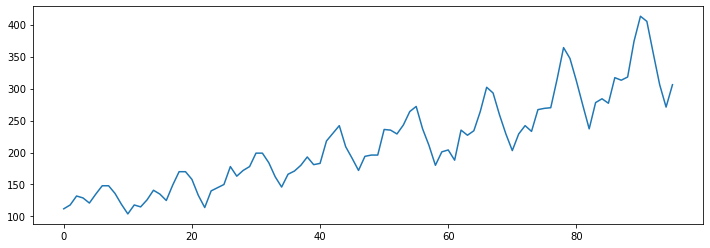

In [2]:
plt.figure(figsize=(12,4))
passengers = pd.read_excel("Airlines+Data.xlsx")
passengers.Passengers.plot()

In [3]:
passengers

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
passengers.isnull().sum()

Month         0
Passengers    0
dtype: int64

# Splitting Data


In [6]:
Train = passengers.head(84)
Test = passengers.tail(12)

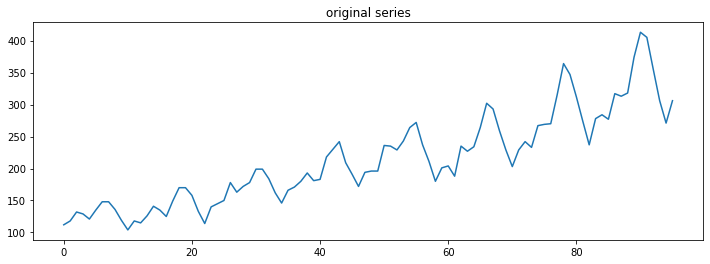

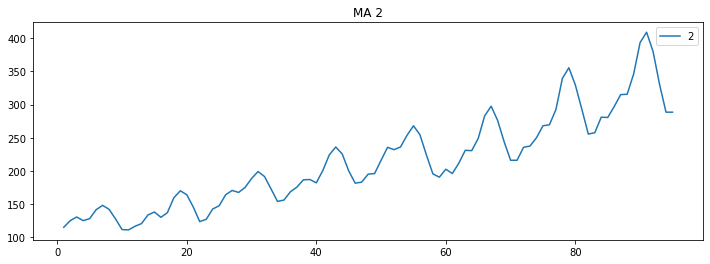

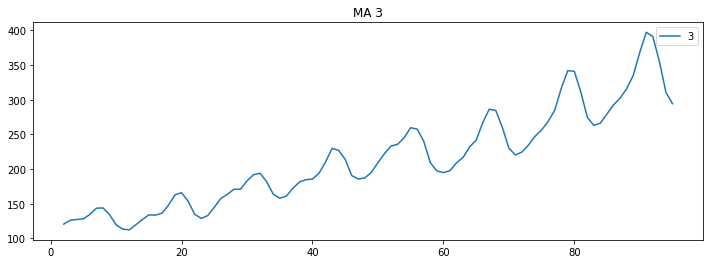

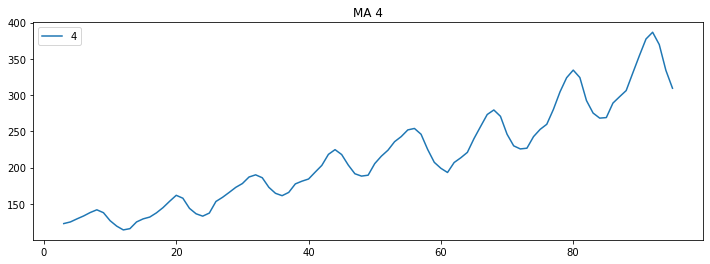

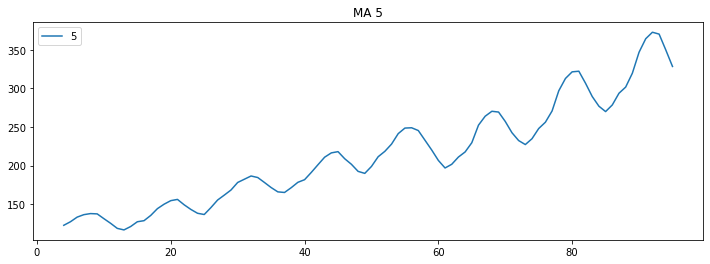

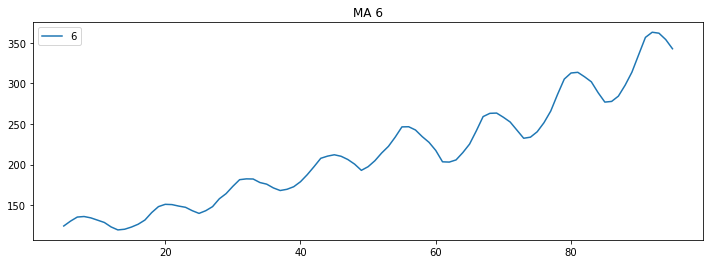

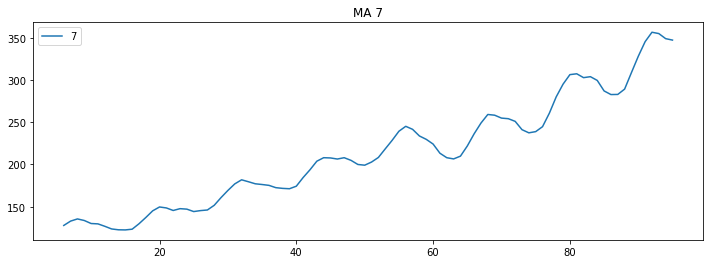

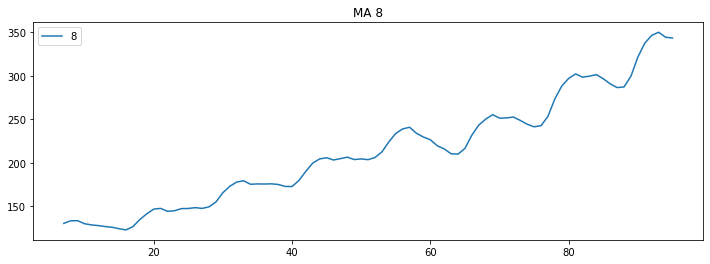

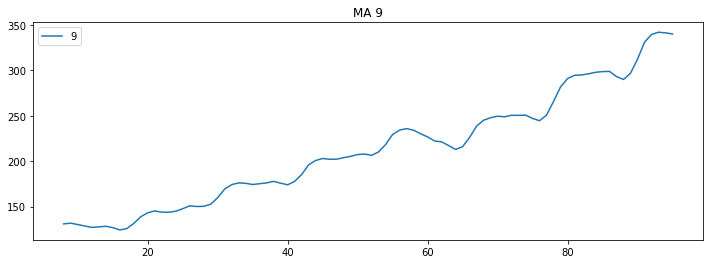

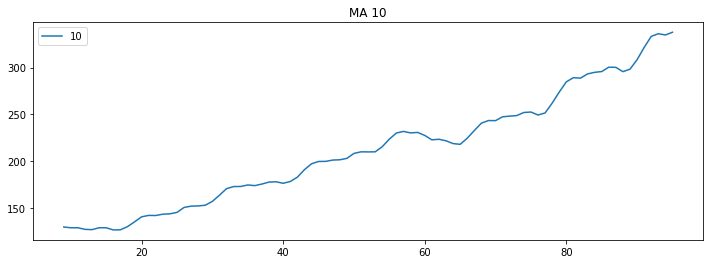

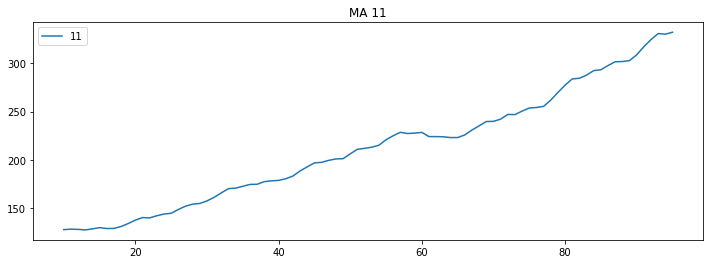

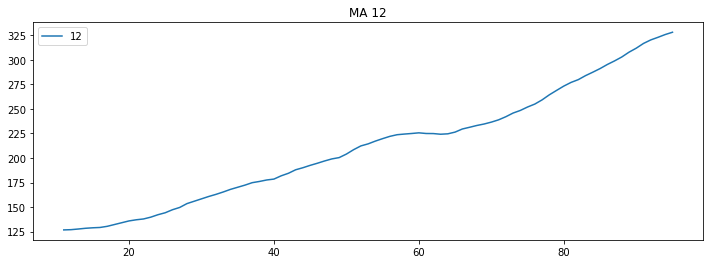

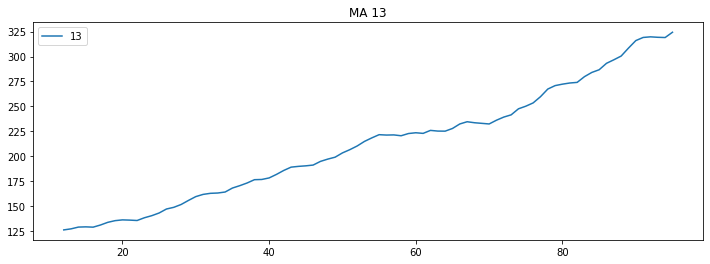

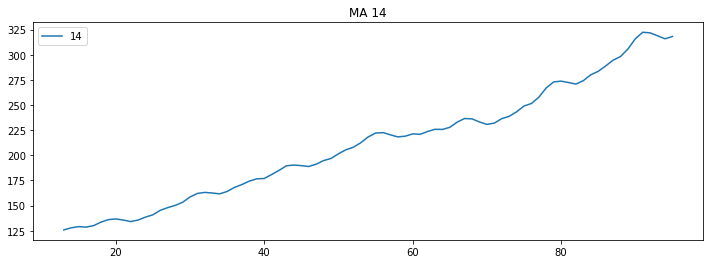

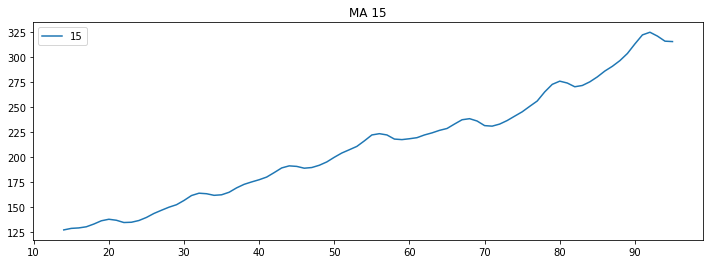

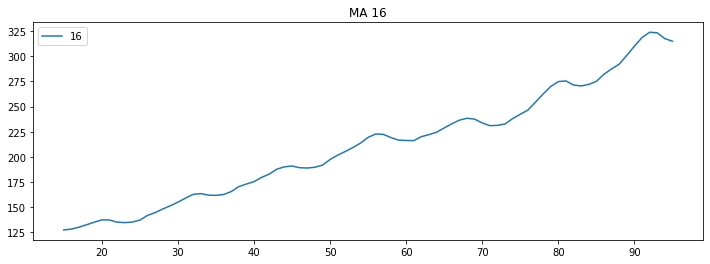

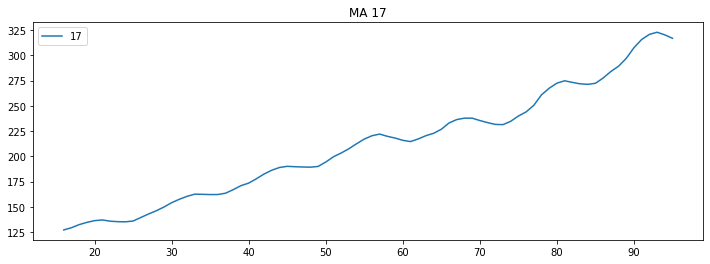

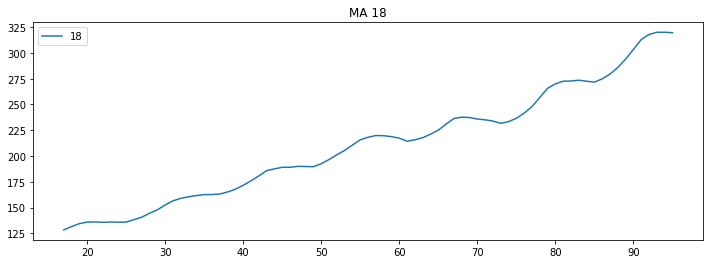

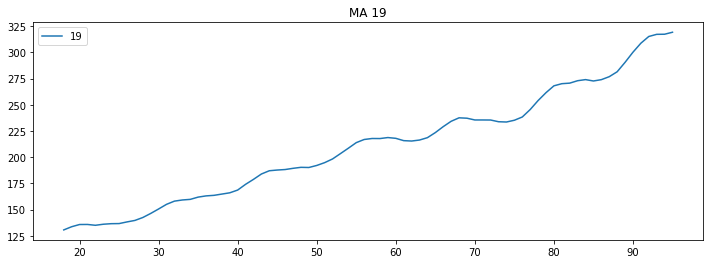

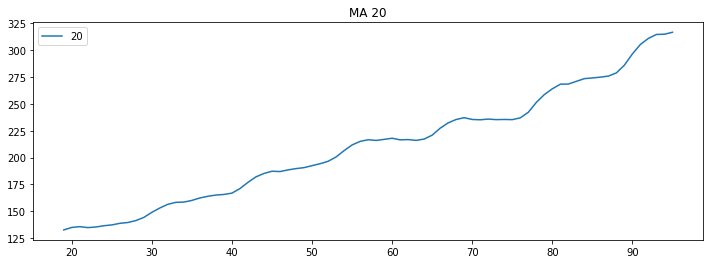

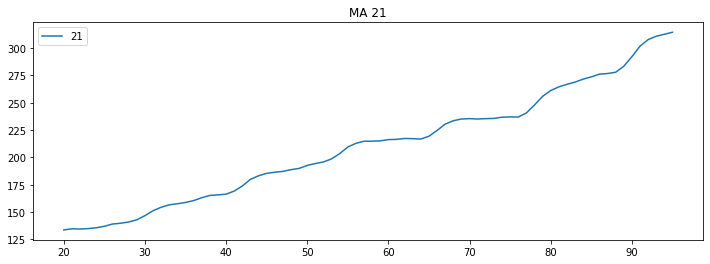

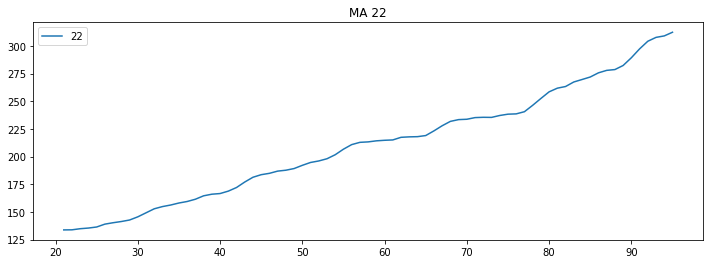

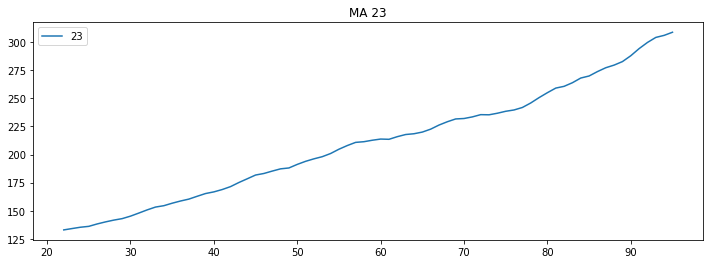

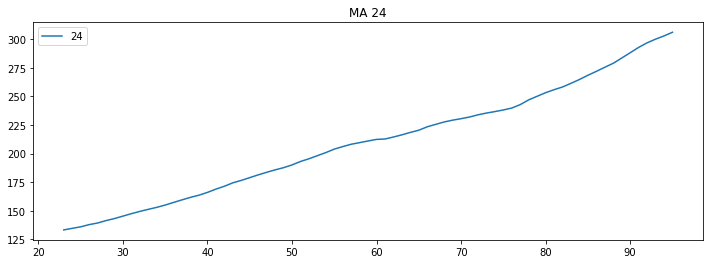

In [7]:
plt.figure(figsize=(12,4))
passengers.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    passengers["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')   
    plt.show()

# Time Series Decomposition Plot


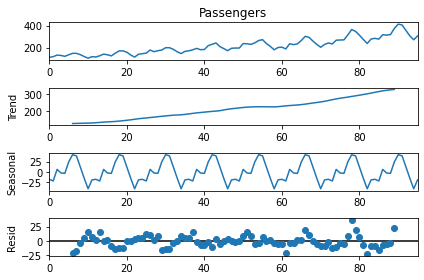

In [8]:
decompose_ts_add = seasonal_decompose(passengers.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# Simple Exponential Method

In [9]:
Train["Passengers"]

0     112
1     118
2     132
3     129
4     121
     ... 
79    347
80    312
81    274
82    237
83    278
Name: Passengers, Length: 84, dtype: int64

In [10]:
Test["Passengers"]

84    284
85    277
86    317
87    313
88    318
89    374
90    413
91    405
92    355
93    306
94    271
95    306
Name: Passengers, dtype: int64

In [11]:
Test.index[0]

84

In [12]:
Test.index[-1]

95

In [13]:
# MAPE stands for mean absolute percentage error
def MAPE(org,pred):    
    Passengers= np.abs((pred-org)/org)*100
    return np.mean(Passengers)

In [14]:
import numpy as np
x=np.linspace(0.1,1,20)

for i in x :
    ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(Test.Passengers,pred_ses) 
    print("smoothing_level ",i,"-->","MAPE Error",score)


smoothing_level  0.1 --> MAPE Error 15.813278836837254
smoothing_level  0.1473684210526316 --> MAPE Error 13.998308786770693
smoothing_level  0.19473684210526315 --> MAPE Error 13.43875758983704
smoothing_level  0.24210526315789474 --> MAPE Error 13.361780244106626
smoothing_level  0.2894736842105263 --> MAPE Error 13.557114617029564
smoothing_level  0.33684210526315794 --> MAPE Error 13.895321792313554
smoothing_level  0.38421052631578945 --> MAPE Error 14.289593448209663
smoothing_level  0.43157894736842106 --> MAPE Error 14.76306690519897
smoothing_level  0.4789473684210527 --> MAPE Error 15.224824028669062
smoothing_level  0.5263157894736842 --> MAPE Error 15.600944301455975
smoothing_level  0.5736842105263158 --> MAPE Error 15.874993628428266
smoothing_level  0.6210526315789474 --> MAPE Error 16.071640221230833
smoothing_level  0.6684210526315789 --> MAPE Error 16.145012862053974
smoothing_level  0.7157894736842105 --> MAPE Error 16.091775475637615
smoothing_level  0.7631578947368

# Double Exponential or Holts method

In [15]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
#         print(hw_model)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
      
        score=MAPE(pred_hw,Test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 11.825704496398115
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 10.985095997850799
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 11.308432046733003
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 11.748306920252949
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 12.00459007499964
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 12.027792455456302
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 11.829735779704256
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 11.538473314781024
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 11.309105092775148
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 11.414437788421175
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 11.506480551777214
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 11.057273723187658
smoothing_level  0.19  smoothing_s

smoothing_level  0.9099999999999999  smoothing_slope 0.73 --> MAPE Error 12.266804264655704
smoothing_level  0.9099999999999999  smoothing_slope 0.82 --> MAPE Error 17.23869157451528
smoothing_level  0.9099999999999999  smoothing_slope 0.9099999999999999 --> MAPE Error 24.25379208264052


In [16]:
a=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
a.sort_values(["score"])

,smoothing_level,smoothing_slope,score
1,0.10,0.19,10.985096
11,0.19,0.19,11.057274
12,0.19,0.28,11.166573
2,0.10,0.28,11.308432
8,0.10,0.82,11.309105
...,...,...,...
49,0.46,0.91,826.936017
47,0.46,0.73,858.326625
46,0.46,0.64,1304.676022
37,0.37,0.73,1611.465475


# Holts winter exponential smoothing with additive seasonality and additive trend

In [17]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 


6.105383911488492

# Final Model by combining train and test

In [18]:
hwe_model_add_add = ExponentialSmoothing(passengers["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [19]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235281
97     311.528396
98     350.278697
99     346.984962
100    351.845000
101    403.925721
102    440.566848
103    427.446585
104    376.628288
105    329.767602
dtype: float64